In [125]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [71]:
def sinusoidal(pos, length):
    """
    Computes the sinusoidal positional encoding for a single position in a sequence.
    
    Args:
        pos (int): The position in the sequence to compute the encoding for.
        length (int): The dimensionality of the encoding.
        
    Returns:
        pos_enc (np.ndarray): The sinusoidal positional encoding for the specified position.
    """
    pos_enc = np.zeros((length,))
    for i in range(length):
        if i % 2 == 0:
            pos_enc[i] = np.sin(pos / 1000**(i/length))
        else:
            pos_enc[i] = np.cos(pos / 1000**((i-1)/length))
    return pos_enc

print(sinusoidal(1, 10))

[0.84147098 0.54030231 0.24855548 0.96861766 0.06305388 0.99801012
 0.01584827 0.99987441 0.00398106 0.99999208]


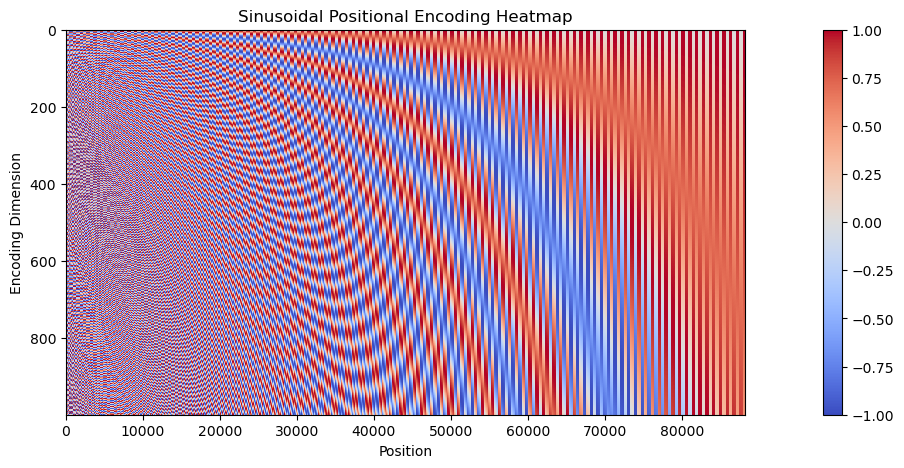

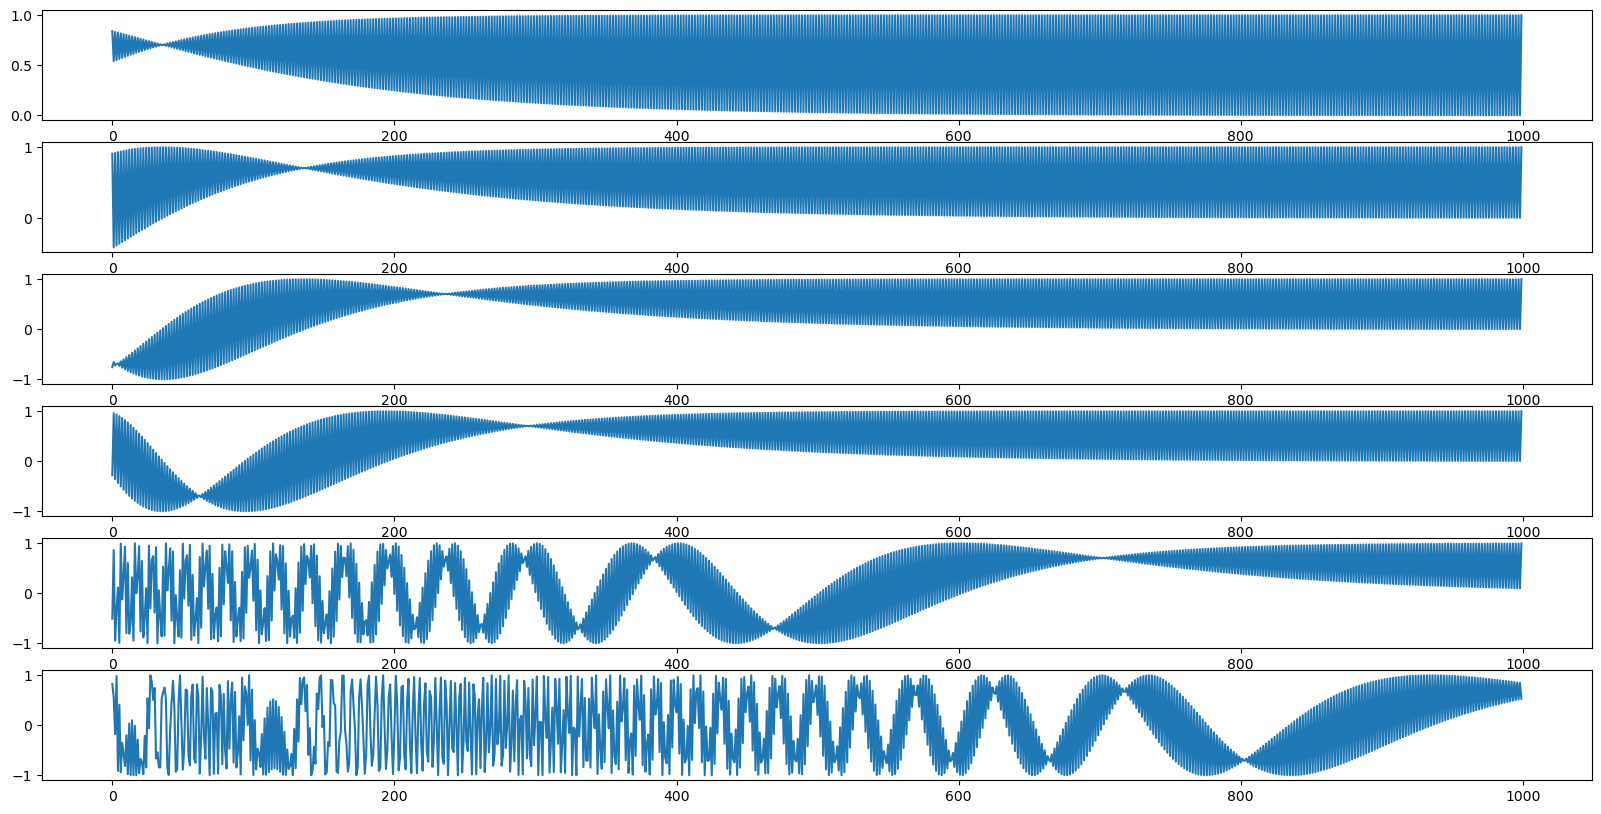

In [4]:
def plotSinusoidal(sinusoidal: np.array):
    """
    Plots a heatmap of a sinusoidal positional encoding.
    
    Args:
    - sinusoidal: A numpy array containing the sinusoidal encoding. The array should have shape (num_positions, encoding_dim).
    """
    # Create a new figure
    plt.figure(figsize=(20, 5))

    # Plot the heatmap
    heatmap = plt.imshow(sinusoidal, cmap='coolwarm', interpolation='nearest', aspect=50)

    # Add a colorbar to the plot
    plt.colorbar(heatmap)

    # Set the x and y labels
    plt.xlabel('Position')
    plt.ylabel('Encoding Dimension')

    # Set the title of the plot
    plt.title('Sinusoidal Positional Encoding Heatmap')

    # Show the plot
    plt.show()

plotSinusoidal(np.array([sinusoidal(i, 88200) for i in range(1000)]))
r = [1,2,4,6,100,1000]
fig, axs = plt.subplots(len(r),1, figsize=(20,10))
for i, j in enumerate(r):
    axs[i].plot(sinusoidal(j,1000))

In [17]:
a = torch.tensor([1,2,3,4])
a = a.unsqueeze(0).unsqueeze(0)
a = a.expand(10, 1, -1)

print(a.shape, a)

torch.Size([10, 1, 4]) tensor([[[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]]])


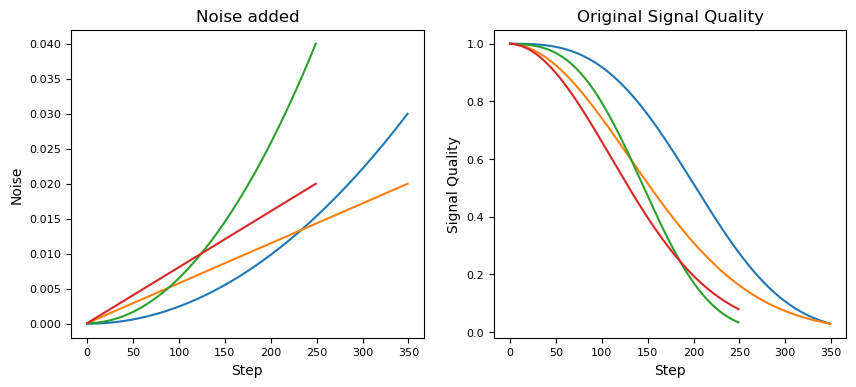

In [140]:
steps = 350
start = 0.00001
end = 0.03


t = torch.linspace(0, 1, steps)
beta = start + (end - start) * t **2#1 / (1 + np.e ** -(a/(end - start)*(t - start-1)))
start = 0.0001
end = 0.02
beta2 = start + (end - start) * t

alpha_hat = torch.cumprod(1 - beta, dim=0)
alpha_hat2 = torch.cumprod(1 - beta2, dim=0)
test = torch.linspace(start, end, steps)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(beta)
axs[0].plot(beta2)
axs[0].set_title('Noise added')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Noise')
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[1].plot(alpha_hat)
axs[1].plot(alpha_hat2)
axs[1].set_title('Original Signal Quality')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Signal Quality')
axs[1].tick_params(axis='both', which='major', labelsize=8)

steps = 250
start = 0.0001
end = 0.04


t = torch.linspace(0, 1, steps)
beta = start + (end - start) * t **2#1 / (1 + np.e ** -(a/(end - start)*(t - start-1)))
start = 0.0001
end = 0.02
beta2 = start + (end - start) * t

alpha_hat = torch.cumprod(1 - beta, dim=0)
alpha_hat2 = torch.cumprod(1 - beta2, dim=0)
test = torch.linspace(start, end, steps)

axs[0].plot(beta)
axs[0].plot(beta2)
axs[0].set_title('Noise added')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Noise')
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[1].plot(alpha_hat)
axs[1].plot(alpha_hat2)
axs[1].set_title('Original Signal Quality')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Signal Quality')
axs[1].tick_params(axis='both', which='major', labelsize=8)

tensor(0.0290) tensor(0.0290) tensor(0.0219)


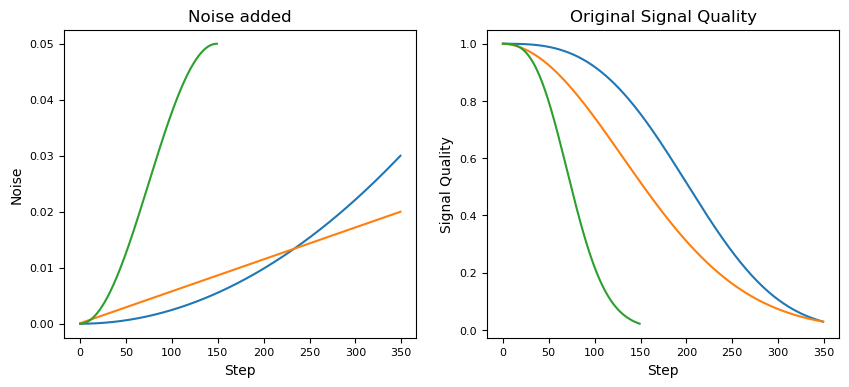

In [337]:
steps = 350


start = 0.00001
end = 0.03
t = torch.linspace(0, 1, steps)
beta = start + (end - start) * t **2#1 / (1 + np.e ** -(a/(end - start)*(t - start-1)))
alpha_hat = torch.cumprod(1 - beta, dim=0)


start = 0.0001
end = 0.02
beta2 = start + (end - start) * t
alpha_hat2 = torch.cumprod(1 - beta2, dim=0)
test = torch.linspace(start, end, steps)
steps = 150

start = 0.00001
end = 0.05
beta3 = start + (end - start) * (torch.cos(torch.linspace(1, 0, steps) * np.pi) / 2 + 0.5) 
alpha_hat3 = torch.cumprod(1 - beta3, dim=0)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].plot(beta)
axs[0].plot(beta2)
axs[0].plot(beta3)
axs[0].set_title('Noise added')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Noise')
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[1].plot(alpha_hat)
axs[1].plot(alpha_hat2)
axs[1].plot(alpha_hat3)
axs[1].set_title('Original Signal Quality')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Signal Quality')
axs[1].tick_params(axis='both', which='major', labelsize=8)
print(alpha_hat[-1], alpha_hat2[-1], alpha_hat3[-1])

In [14]:
import itertools
from itertools import chain, repeat, count
start = 1
end = 10
loop = 2


it = itertools.chain.from_iterable(zip(itertools.count(start), itertools.repeat(end)))
for i in chain(range(start, end), [1]*0):
    print(i)

1
2
3
4
5
6
7
8
9


In [141]:
import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from IPython.display import Image, Audio
from diffusion import Diffusion
import numpy as np
import torch
import json
import glob
from model import UNet

import os

from diffusion import Diffusion

# Load JSON config file
config_path = 'config.json'
with open(config_path) as f:
    config_json = json.load(f)

# create the config file
class Config:
    pass
config = Config()
for key, data in config_json.items():
    setattr(config, key, data)

# set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config.device = device

# create the model and the diffusion
config.current_epoch = 0


class AudioDataset(Dataset):
    def __init__(self, diffusion: Diffusion,dir_path, device: torch.device):
        waveforms = []
        files = glob.glob(os.path.join(dir_path, "*.wav"))
        for path in files:
            waveform, sr = torchaudio.load(path)
            waveform = waveform * 0.98 / torch.max(waveform)
            waveforms.append((0+1, waveform))

        if len(waveforms) == 0:
            raise AttributeError('Data-path seems to be empty')

        self.waveforms = waveforms
        self.device = device
        self.length = config.audio_length
        self.diffusion = diffusion

    def __len__(self):
        return len(self.waveforms)

    def __getitem__(self, idx):
        label, waveform = self.waveforms[idx]
        waveform = waveform.to(self.device)

        # Apply gain
        waveform = waveform * (1 - np.random.normal(0, 0.15)**2)

        # create a different starting point and roll the data over
        waveform = torch.roll(waveform, np.random.randint(waveform.shape[1]), dims=1)

        # create the diffusion
        max_timestamp = self.diffusion.steps
        timestamp = 249
        x_t, noise = self.diffusion(waveform, self.timestamp)

        x_t = x_t.to(self.device)
        noise = noise.to(self.device)

        return x_t, noise, timestamp, label

config.beta_start = 0.00001
config.beta_end = 0.03
config.step_count = 300
diffusion = Diffusion(config)
    
dataset = AudioDataset(diffusion, '/Users/timowendner/Programming/AudioDiffusion/data/GunShot', device)
dataset.timestamp = 200
x_t, noise, timestamp, label = dataset[0]
x_t = x_t[0].numpy()


In [123]:
print(np.mean(x_t))

0.0006201511


In [124]:
Audio(x_t, rate=22050)

In [143]:
audio, sr = torchaudio.load('/Users/timowendner/Programming/Semester 4/AudioDiffusion/output_12May_2042_ 9.wav')

In [144]:
audio

tensor([[1.5259e-04, 7.6294e-04, 2.6550e-03,  ..., 1.5512e-01, 2.6340e-01,
         8.9996e-01]])

In [145]:
audio.shape

torch.Size([1, 88200])

In [146]:
audio = audio[0].numpy()

In [147]:
audio

array([1.5258789e-04, 7.6293945e-04, 2.6550293e-03, ..., 1.5512085e-01,
       2.6339722e-01, 8.9996338e-01], dtype=float32)

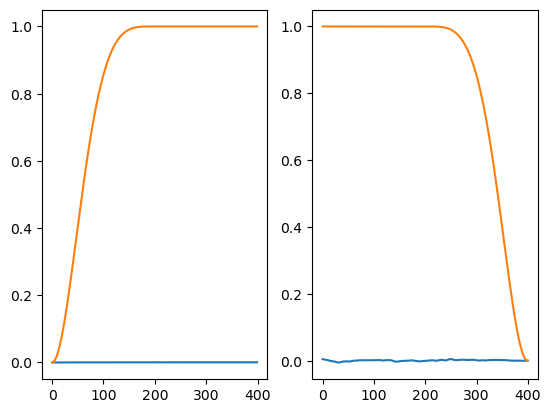

In [308]:
import matplotlib.pyplot as plt
num = 400
cut = 200
fig, axis = plt.subplots(1,2)
audio, sr = torchaudio.load('/Users/timowendner/Programming/Semester 4/AudioDiffusion/output_12May_2042_ 9.wav')
audio = audio[0].numpy()

graph = np.ones(num)
lin = np.cos(np.linspace(1, 0, cut)**2 * np.pi) / 2 + 0.5
graph[:cut] = graph[:cut] * lin
audio[:cut] = audio[:cut] * lin
axis[0].plot(audio[:num])
axis[0].plot(graph)

graph = np.ones(num)
graph[-cut:] = graph[-cut:] * lin[::-1]
audio[-cut:] = audio[-cut:] * lin[::-1]
axis[1].plot(audio[-num:])
axis[1].plot(graph)
plt.show()

In [258]:
import os
path = '/Users/timowendner/Programming/AudioDiffusion/data'
dirs = os.listdir(path)
for d in dirs:
    p = os.path.join(path, d)
    if not os.path.isfile(p):
        m = []
        for file in os.listdir(p):
            audio, sr = torchaudio.load(os.path.join(p, file))
            m.append(torch.max(audio))
        print(np.mean(m), d)

0.57563317 Sneeze_Cough
0.25513673 Rain
0.49941474 MovingMotorVehicle
0.5508247 DogBark
0.44794556 Footstep
0.78885514 GunShot
0.5194051 Keyboard
